In [5]:
import kagglehub
azharsaleem_real_estate_goldmine_dubai_uae_rental_market_path = kagglehub.dataset_download('azharsaleem/real-estate-goldmine-dubai-uae-rental-market')

print('Data source import complete.')


Data source import complete.


# Rent Prediction Insights in Dubai: Achieving 96% Accuracy

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("/content/dubai_properties.csv")
data.dropna(inplace=True)
data.columns
data

Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
...                                                  ...     ...   ...    ...   
73729                          Al Salamah, Umm Al Quwain   10000     0      1   
73734                           Al Ramlah, Umm Al Quwain   25000     1      1   
73735                Umm Al Quwain Marina, Umm Al Quwain   22000     2      2   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   

            Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0      Apartment          1785      69.467787        Medium    Yearly   
1      Apartment          1422      98.452883        Medium    Yearly   
2      Apartment          1314      75.342466        Medium    Yearly   
3      Penthouse          3843      57.246942          High    Yearly   
4          Villa          6860      51.020408          High    Yearly   
...          ...           ...            ...           ...       ...   
73729  Apartment           249      40.160643           Low    Yearly   
73734      Villa           500      50.000000           Low    Yearly   
73735  Apartment          1000      22.000000           Low    Yearly   
73737  Apartment           419      33.412888           Low    Yearly   
73738  Apartment           500      28.000000           Low    Yearly   

        Furnishing   Purpose Posted_date  Age_of_listing_in_days  \
0      Unfurnished  For Rent  2024-03-07                      45   
1      Unfurnished  For Rent  2024-03-08                      44   
2        Furnished  For Rent  2024-03-21                      31   
3      Unfurnished  For Rent  2024-02-24                      57   
4      Unfurnished  For Rent  2024-02-16                      65   
...            ...       ...         ...                     ...   
73729  Unfurnished  For Rent  2023-12-09                     134   
73734  Unfurnished  For Rent  2023-12-01                     142   
73735  Unfurnished  For Rent  2024-03-26                      26   
73737  Unfurnished  For Rent  2023-12-14                     129   
73738  Unfurnished  For Rent  2023-12-14                     129   

                   Location           City   Latitude  Longitude  
0            Al Reem Island      Abu Dhabi  24.493598  54.407841  
1                Yas Island      Abu Dhabi  24.494022  54.607372  
2             Al Raha Beach      Abu Dhabi  24.485931  54.600939  
3            Al Reem Island      Abu Dhabi  24.493598  54.407841  
4                Yas Island      Abu Dhabi  24.494022  54.607372  
...                     ...            ...        ...        ...  
73729            Al Salamah  Umm Al Quwain  25.493412  55.575994  
73734             Al Ramlah  Umm Al Quwain  25.511461  55.578804  
73735  Umm Al Quwain Marina  Umm Al Quwain  25.527959  55.606527  
73737            Al Salamah  Umm Al Quwain  25.493412  55.575994  
73738  Umm Al Quwain Marina  Umm Al Quwain  25.527959  55.606527  

[73023 rows x 17 columns]

In [8]:
# Average rent prices by property type
average_rent_by_type = data.groupby('Type')['Rent'].mean()
print(average_rent_by_type)
print("////////////////////////////////////////////////////////////////////////////")
# Compare average rents for furnished vs. unfurnished properties
average_rent_by_furnishing = data.groupby('Furnishing')['Rent'].mean()
print(average_rent_by_furnishing)

Type
Apartment               1.100011e+05
Hotel Apartment         2.267081e+05
Penthouse               4.870754e+05
Residential Building    2.866282e+06
Residential Floor       1.409327e+06
Residential Plot        2.996498e+05
Townhouse               1.916066e+05
Villa                   2.870596e+05
Villa Compound          1.799667e+05
Name: Rent, dtype: float64
////////////////////////////////////////////////////////////////////////////
Furnishing
Furnished      205998.104373
Unfurnished    132695.521775
Name: Rent, dtype: float64


# Rental Property Distribution by City

In [9]:
import plotly.express as px
plt.style.use('dark_background')
# Assuming 'data' is your DataFrame containing rental data
city_distribution = data['City'].value_counts().reset_index()
city_distribution.columns = ['City', 'Number of Properties']

fig = px.bar(city_distribution, x='City', y='Number of Properties',
             title='Rental Property Distribution by City',
             labels={'Number of Properties': 'Number of Properties'})
fig.update_layout(xaxis_title='City', yaxis_title='Number of Properties')
fig.show()

# Rental Properties Locations MAP in UAE

In [10]:



fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", hover_name="Address", hover_data=["Rent", "Beds", "Baths"],
                        color_discrete_sequence=["fuchsia"], zoom=5, height=600)


fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Rental Properties Locations in UAE')


fig.show()


# Average Monthly Rent Prices Over Time

In [11]:


# Assuming 'data' is your DataFrame containing rental data
data['Posted_date'] = pd.to_datetime(data['Posted_date'])
rental_trend = data.groupby(data['Posted_date'].dt.to_period('M'))['Rent'].mean().reset_index()
rental_trend['Posted_date'] = rental_trend['Posted_date'].astype(str)  # Convert Period to string

fig = px.line(rental_trend, x='Posted_date', y='Rent',
              title='Average Monthly Rent Prices Over Time',
              labels={'Posted_date': 'Month', 'Rent': 'Average Rent (AED)'})

fig.show()


# Correlation Matrix

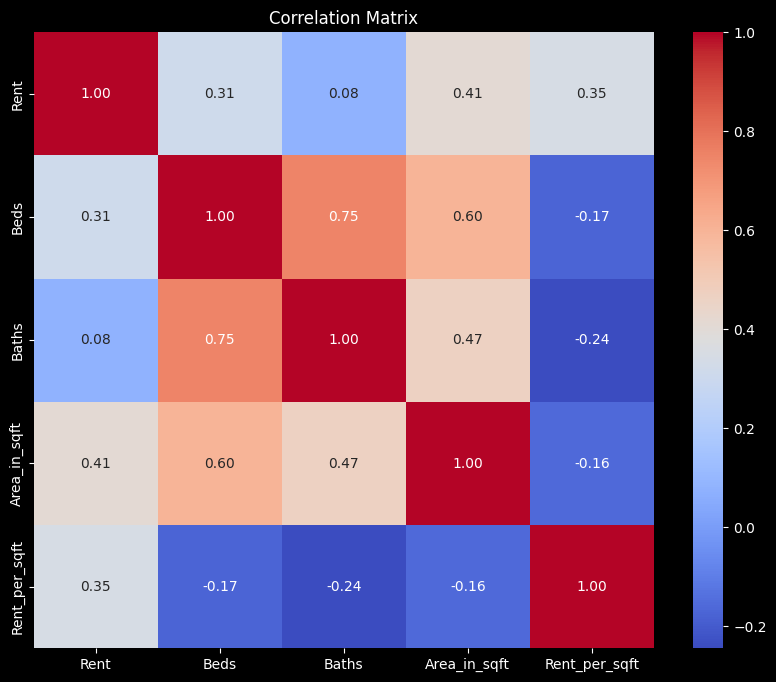

In [12]:
# Calculate the correlation matrix
correlation_matrix = data[['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft']].corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Rent Category Distribution by Property Type

In [13]:
# Group by property type and rent category
rent_category_by_type = data.groupby(['Type', 'Rent_category']).size().unstack().reset_index()

# Melt the DataFrame to long format for Plotly Express
rent_category_by_type_melted = pd.melt(rent_category_by_type, id_vars='Type', value_vars=['Low', 'Medium', 'High'],
                                      var_name='Rent Category', value_name='Count')

# Plot a stacked bar chart using Plotly Express
fig = px.bar(rent_category_by_type_melted, x='Type', y='Count', color='Rent Category',
             barmode='stack', title='Rent Category Distribution by Property Type',
             labels={'Type': 'Property Type', 'Count': 'Count', 'Rent Category': 'Rent Category'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# prediction model

In [15]:
dp=pd.read_csv("/content/dubai_properties.csv")
dp.dropna(inplace=True)
dp

Address    Rent  Beds  Baths  \
0      The Gate Tower 2, The Gate Tower, Shams Gate D...  124000     3      4   
1                    Water's Edge, Yas Island, Abu Dhabi  140000     3      4   
2                Al Raha Lofts, Al Raha Beach, Abu Dhabi   99000     2      3   
3      Marina Heights, Marina Square, Al Reem Island,...  220000     3      4   
4                        West Yas, Yas Island, Abu Dhabi  350000     5      7   
...                                                  ...     ...   ...    ...   
73729                          Al Salamah, Umm Al Quwain   10000     0      1   
73734                           Al Ramlah, Umm Al Quwain   25000     1      1   
73735                Umm Al Quwain Marina, Umm Al Quwain   22000     2      2   
73737             Al Huboob 1, Al Salamah, Umm Al Quwain   14000     0      1   
73738                Umm Al Quwain Marina, Umm Al Quwain   14000     0      1   

            Type  Area_in_sqft  Rent_per_sqft Rent_category Frequency  \
0      Apartment          1785      69.467787        Medium    Yearly   
1      Apartment          1422      98.452883        Medium    Yearly   
2      Apartment          1314      75.342466        Medium    Yearly   
3      Penthouse          3843      57.246942          High    Yearly   
4          Villa          6860      51.020408          High    Yearly   
...          ...           ...            ...           ...       ...   
73729  Apartment           249      40.160643           Low    Yearly   
73734      Villa           500      50.000000           Low    Yearly   
73735  Apartment          1000      22.000000           Low    Yearly   
73737  Apartment           419      33.412888           Low    Yearly   
73738  Apartment           500      28.000000           Low    Yearly   

        Furnishing   Purpose Posted_date  Age_of_listing_in_days  \
0      Unfurnished  For Rent  2024-03-07                      45   
1      Unfurnished  For Rent  2024-03-08                      44   
2        Furnished  For Rent  2024-03-21                      31   
3      Unfurnished  For Rent  2024-02-24                      57   
4      Unfurnished  For Rent  2024-02-16                      65   
...            ...       ...         ...                     ...   
73729  Unfurnished  For Rent  2023-12-09                     134   
73734  Unfurnished  For Rent  2023-12-01                     142   
73735  Unfurnished  For Rent  2024-03-26                      26   
73737  Unfurnished  For Rent  2023-12-14                     129   
73738  Unfurnished  For Rent  2023-12-14                     129   

                   Location           City   Latitude  Longitude  
0            Al Reem Island      Abu Dhabi  24.493598  54.407841  
1                Yas Island      Abu Dhabi  24.494022  54.607372  
2             Al Raha Beach      Abu Dhabi  24.485931  54.600939  
3            Al Reem Island      Abu Dhabi  24.493598  54.407841  
4                Yas Island      Abu Dhabi  24.494022  54.607372  
...                     ...            ...        ...        ...  
73729            Al Salamah  Umm Al Quwain  25.493412  55.575994  
73734             Al Ramlah  Umm Al Quwain  25.511461  55.578804  
73735  Umm Al Quwain Marina  Umm Al Quwain  25.527959  55.606527  
73737            Al Salamah  Umm Al Quwain  25.493412  55.575994  
73738  Umm Al Quwain Marina  Umm Al Quwain  25.527959  55.606527  

[73023 rows x 17 columns]

In [16]:
dp.columns
col_to_Encoder=['Address',   'Type',   'Rent_category', 'Frequency', 'Furnishing', 'Purpose',
       'Posted_date',   'Location', 'City'  ]

# Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

Lbl=LabelEncoder()
# Initialize LabelEncoder

label_encoder = LabelEncoder()

# LabelEncode float columns

for z in col_to_Encoder:
    dp[z] = label_encoder.fit_transform(dp[z])

print(dp)


       Address    Rent  Beds  Baths  Type  Area_in_sqft  Rent_per_sqft  \
0         3905  124000     3      4     0          1785      69.467787   
1         4219  140000     3      4     0          1422      98.452883   
2          668   99000     2      3     0          1314      75.342466   
3         2682  220000     3      4     2          3843      57.246942   
4         4233  350000     5      7     7          6860      51.020408   
...        ...     ...   ...    ...   ...           ...            ...   
73729      756   10000     0      1     0           249      40.160643   
73734      680   25000     1      1     7           500      50.000000   
73735     4125   22000     2      2     0          1000      22.000000   
73737      344   14000     0      1     0           419      33.412888   
73738     4125   14000     0      1     0           500      28.000000   

       Rent_category  Frequency  Furnishing  Purpose  Posted_date  \
0                  2          0           

In [18]:
dp

Address    Rent  Beds  Baths  Type  Area_in_sqft  Rent_per_sqft  \
0         3905  124000     3      4     0          1785      69.467787   
1         4219  140000     3      4     0          1422      98.452883   
2          668   99000     2      3     0          1314      75.342466   
3         2682  220000     3      4     2          3843      57.246942   
4         4233  350000     5      7     7          6860      51.020408   
...        ...     ...   ...    ...   ...           ...            ...   
73729      756   10000     0      1     0           249      40.160643   
73734      680   25000     1      1     7           500      50.000000   
73735     4125   22000     2      2     0          1000      22.000000   
73737      344   14000     0      1     0           419      33.412888   
73738     4125   14000     0      1     0           500      28.000000   

       Rent_category  Frequency  Furnishing  Purpose  Posted_date  \
0                  2          0           1        0          503   
1                  2          0           1        0          504   
2                  2          0           0        0          517   
3                  0          0           1        0          491   
4                  0          0           1        0          483   
...              ...        ...         ...      ...          ...   
73729              1          0           1        0          414   
73734              1          0           1        0          406   
73735              1          0           1        0          522   
73737              1          0           1        0          419   
73738              1          0           1        0          419   

       Age_of_listing_in_days  Location  City   Latitude  Longitude  
0                          45       135     0  24.493598  54.407841  
1                          44       353     0  24.494022  54.607372  
2                          31       120     0  24.485931  54.600939  
3                          57       135     0  24.493598  54.407841  
4                          65       353     0  24.494022  54.607372  
...                       ...       ...   ...        ...        ...  
73729                     134       145     7  25.493412  55.575994  
73734                     142       126     7  25.511461  55.578804  
73735                      26       344     7  25.527959  55.606527  
73737                     129       145     7  25.493412  55.575994  
73738                     129       344     7  25.527959  55.606527  

[73023 rows x 17 columns]

In [19]:
X=dp.drop('Rent',axis=1)
X

Address  Beds  Baths  Type  Area_in_sqft  Rent_per_sqft  Rent_category  \
0         3905     3      4     0          1785      69.467787              2   
1         4219     3      4     0          1422      98.452883              2   
2          668     2      3     0          1314      75.342466              2   
3         2682     3      4     2          3843      57.246942              0   
4         4233     5      7     7          6860      51.020408              0   
...        ...   ...    ...   ...           ...            ...            ...   
73729      756     0      1     0           249      40.160643              1   
73734      680     1      1     7           500      50.000000              1   
73735     4125     2      2     0          1000      22.000000              1   
73737      344     0      1     0           419      33.412888              1   
73738     4125     0      1     0           500      28.000000              1   

       Frequency  Furnishing  Purpose  Posted_date  Age_of_listing_in_days  \
0              0           1        0          503                      45   
1              0           1        0          504                      44   
2              0           0        0          517                      31   
3              0           1        0          491                      57   
4              0           1        0          483                      65   
...          ...         ...      ...          ...                     ...   
73729          0           1        0          414                     134   
73734          0           1        0          406                     142   
73735          0           1        0          522                      26   
73737          0           1        0          419                     129   
73738          0           1        0          419                     129   

       Location  City   Latitude  Longitude  
0           135     0  24.493598  54.407841  
1           353     0  24.494022  54.607372  
2           120     0  24.485931  54.600939  
3           135     0  24.493598  54.407841  
4           353     0  24.494022  54.607372  
...         ...   ...        ...        ...  
73729       145     7  25.493412  55.575994  
73734       126     7  25.511461  55.578804  
73735       344     7  25.527959  55.606527  
73737       145     7  25.493412  55.575994  
73738       344     7  25.527959  55.606527  

[73023 rows x 16 columns]

In [20]:
y=dp["Rent"]
y

0        124000
1        140000
2         99000
3        220000
4        350000
          ...  
73729     10000
73734     25000
73735     22000
73737     14000
73738     14000
Name: Rent, Length: 73023, dtype: int64

# GradientBoostingRegressor

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SCORE

In [23]:
model = GradientBoostingRegressor(n_estimators=150, learning_rate=1, random_state=0)
model.fit(X_train, y_train)

# Evaluate model performance
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

print("Train R^2:", train_score)
print("Test R^2:", test_score)


Train R^2: 0.9990478049036144
Test R^2: 0.9607048058060835
